In [127]:
%matplotlib notebook

In [128]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as ss

In [129]:
raw_data = sio.loadmat('data/raw/m4000Series_m4028.mat')

In [130]:
lfp = raw_data['m4028_session1'][0][0][0].flatten()
run_speed = raw_data['m4028_session1']['run_speed'][0][0].flatten()
true_ripples = raw_data['m4028_session1']['rippleLocs'][0][0].flatten()

candidat_ripples = sio.loadmat('data/raw/m4028_session1.mat')['rippleIdx'].flatten()

In [131]:
lfp.shape, run_speed.shape, true_ripples.shape

((1507795,), (1507795,), (113,))

In [163]:
fs = 2500. 
dt = 1. / fs
t = np.arange(lfp.shape[0]) * dt

In [133]:
ss.hilbert?

In [150]:
# filtering
b, a = ss.butter(5, Wn=np.array([150, 250]) / (fs/2), btype='bandpass')
fLFP = ss.filtfilt(b, a, lfp)                 

In [148]:
# hilbert transform
eLFP = abs(ss.hilbert(fLFP))

<IPython.core.display.Javascript object>


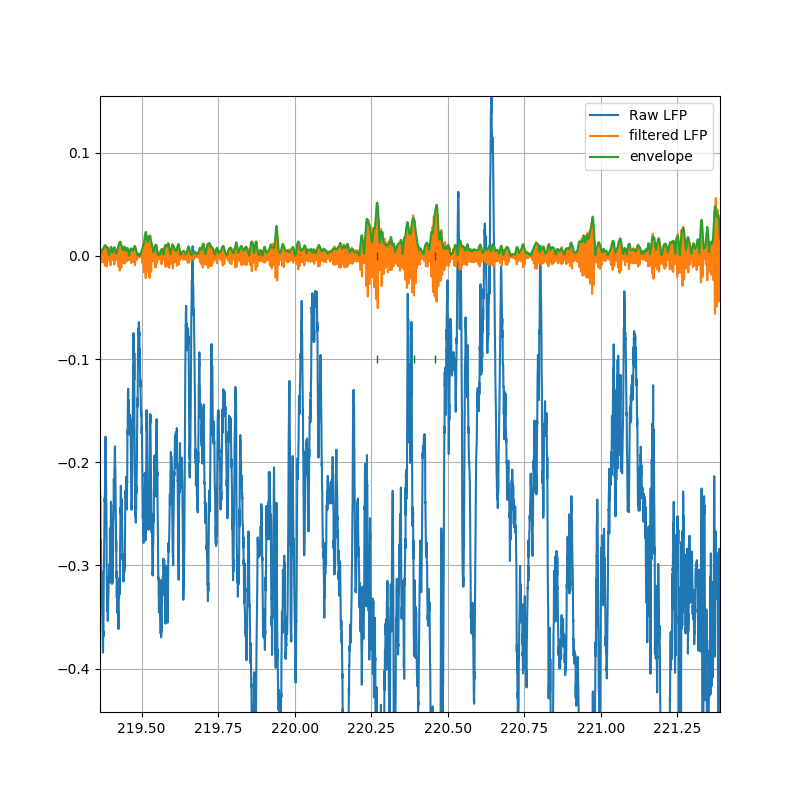

In [151]:
plt.figure(figsize=(8, 8))
plt.plot(t, lfp, label='Raw LFP')
plt.plot(t, fLFP, label='filtered LFP')
plt.plot(t, eLFP, label='envelope')


#plt.plot(t, run_speed, label='running speed')

plt.plot(t[true_ripples], np.zeros(t[true_ripples].size), 'r|')
plt.plot(t[candidat_ripples], np.zeros(t[candidat_ripples].size)-.1, 'g|')
plt.grid()

#for i in range(true_ripples.shape[0]):
#    plt.scatter(x=t[true_ripples[i]], color='black')
#for i in range(true_ripples.shape[0]):
#    plt.axvline(x=t[true_ripples[i]], color='black')
plt.legend()
plt.show()

array([[9.71429353e-06, 8.38585282e-06, 1.57041840e-05, ...,
        7.48953306e-07, 1.06655778e-06, 1.81328436e-05],
       [1.47427130e-04, 1.33461770e-03, 4.18167758e-04, ...,
        3.84037003e-05, 4.64249107e-05, 1.44106441e-03],
       [3.13687426e-04, 8.55453752e-04, 3.01495671e-04, ...,
        3.48573617e-06, 9.68856253e-05, 2.43755362e-04],
       ...,
       [3.60187841e-09, 2.94399275e-08, 1.64963506e-07, ...,
        1.46104264e-08, 2.61743854e-08, 5.50200653e-08],
       [2.70104364e-08, 9.30235763e-09, 8.76944174e-08, ...,
        1.90417535e-08, 1.42442906e-08, 2.17297945e-08],
       [7.78933476e-09, 1.45693955e-08, 4.15620181e-10, ...,
        6.08703481e-09, 8.72214136e-09, 1.03111471e-09]])

In [180]:
# fS, tS, Sxx = signal.spectrogram(lfp[(t>=100) & (t <200)], fs, nfft=256, noverlap=250)

In [182]:
# plt.figure()
# plt.pcolormesh(tS, fS[fS>=10], np.log(Sxx[fS>=10, ]))
# plt.plot(t[true_ripples], np.zeros(t[true_ripples].size)+200, 'w|')
# plt.xlim(tS.min(), tS.max())
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()

((129, 446), (129,))